# Fundamental Analysis

In [3]:
import pandas as pd
from vnstock import Vnstock
# Set date range
start_date = '2024-01-01'
end_date = '2025-03-19'
interval = '1D'
symbol='REE'
stock = Vnstock().stock(symbol=symbol, source='VCI')
candle_df = stock.quote.history(start= start_date, end= end_date)


## 👋 Chào mừng bạn đến với Vnstock!

Cảm ơn bạn đã sử dụng package phân tích chứng khoán #1 tại Việt Nam

* Tài liệu: [Sổ tay hướng dẫn](https://vnstocks.com/docs/category/s%E1%BB%95-tay-h%C6%B0%E1%BB%9Bng-d%E1%BA%ABn)
* Cộng đồng: [Nhóm Facebook](https://www.facebook.com/groups/vnstock.official)

Khám phá các tính năng mới nhất và tham gia cộng đồng để nhận hỗ trợ.
                

In [4]:
CashFlow = stock.finance.cash_flow(period='year')
#CashFlow.to_csv('./outputs/CashFlow.csv')

## Transpose the CF dataframe 

In [5]:
#CashFlow
CashFlow_transposed = CashFlow.T
CashFlow_transposed.columns = CashFlow['yearReport']
# Drop the duplicate 'yearReport' row
CashFlow_transposed = CashFlow_transposed.drop('yearReport')


In [6]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Normalize values to billions
data = CashFlow['Net cash inflows/outflows from operating activities'] / 1000_000_000

# Sort data by year to ensure proper ordering
sorted_indices = CashFlow['yearReport'].argsort()
years = CashFlow['yearReport'].iloc[sorted_indices].tolist()
sorted_data = data.iloc[sorted_indices].tolist()

# Create the figure
fig = go.Figure()

# Add the bar chart
fig.add_trace(go.Bar(
    x=years,
    y=sorted_data,
    text=[f'{v:.2f}' for v in sorted_data],
    textposition='outside',
    marker_color='rgb(66, 135, 245)',
    marker_line_color='lightgrey',
    marker_line_width=1.5,
    opacity=0.8
))

# Update layout
fig.update_layout(
    title='Net Operating Cashflow',
    xaxis_title='Years',
    yaxis_title='Value (Billions)',
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=80, b=50),
    height=500,
    width=800
)

# Clean up the axes
fig.update_xaxes(
    tickangle=45,
    showgrid=False
)

fig.update_yaxes(
    showgrid=False,
    gridcolor='lightgray',
    gridwidth=0.5
)

# Show the plot
fig.show()

In [7]:
Ratio = stock.finance.ratio(period='year', lang='vi', dropna=True)

### Transpose the data frame to display on the web.

In [8]:
Ratio_transposed = Ratio.T
Ratio_transposed.columns=Ratio_transposed.iloc[1]
Ratio_transposed = Ratio_transposed.iloc[3:]

In [9]:
# Example: Select the 'ROE (%)' column under 'Chỉ tiêu khả năng sinh lợi'
dividend_yield = Ratio[('Chỉ tiêu khả năng sinh lợi', 'Tỷ suất cổ tức (%)')]
Outstanding_Shares = Ratio[('Chỉ tiêu định giá', 'Số CP lưu hành (Triệu CP)')]


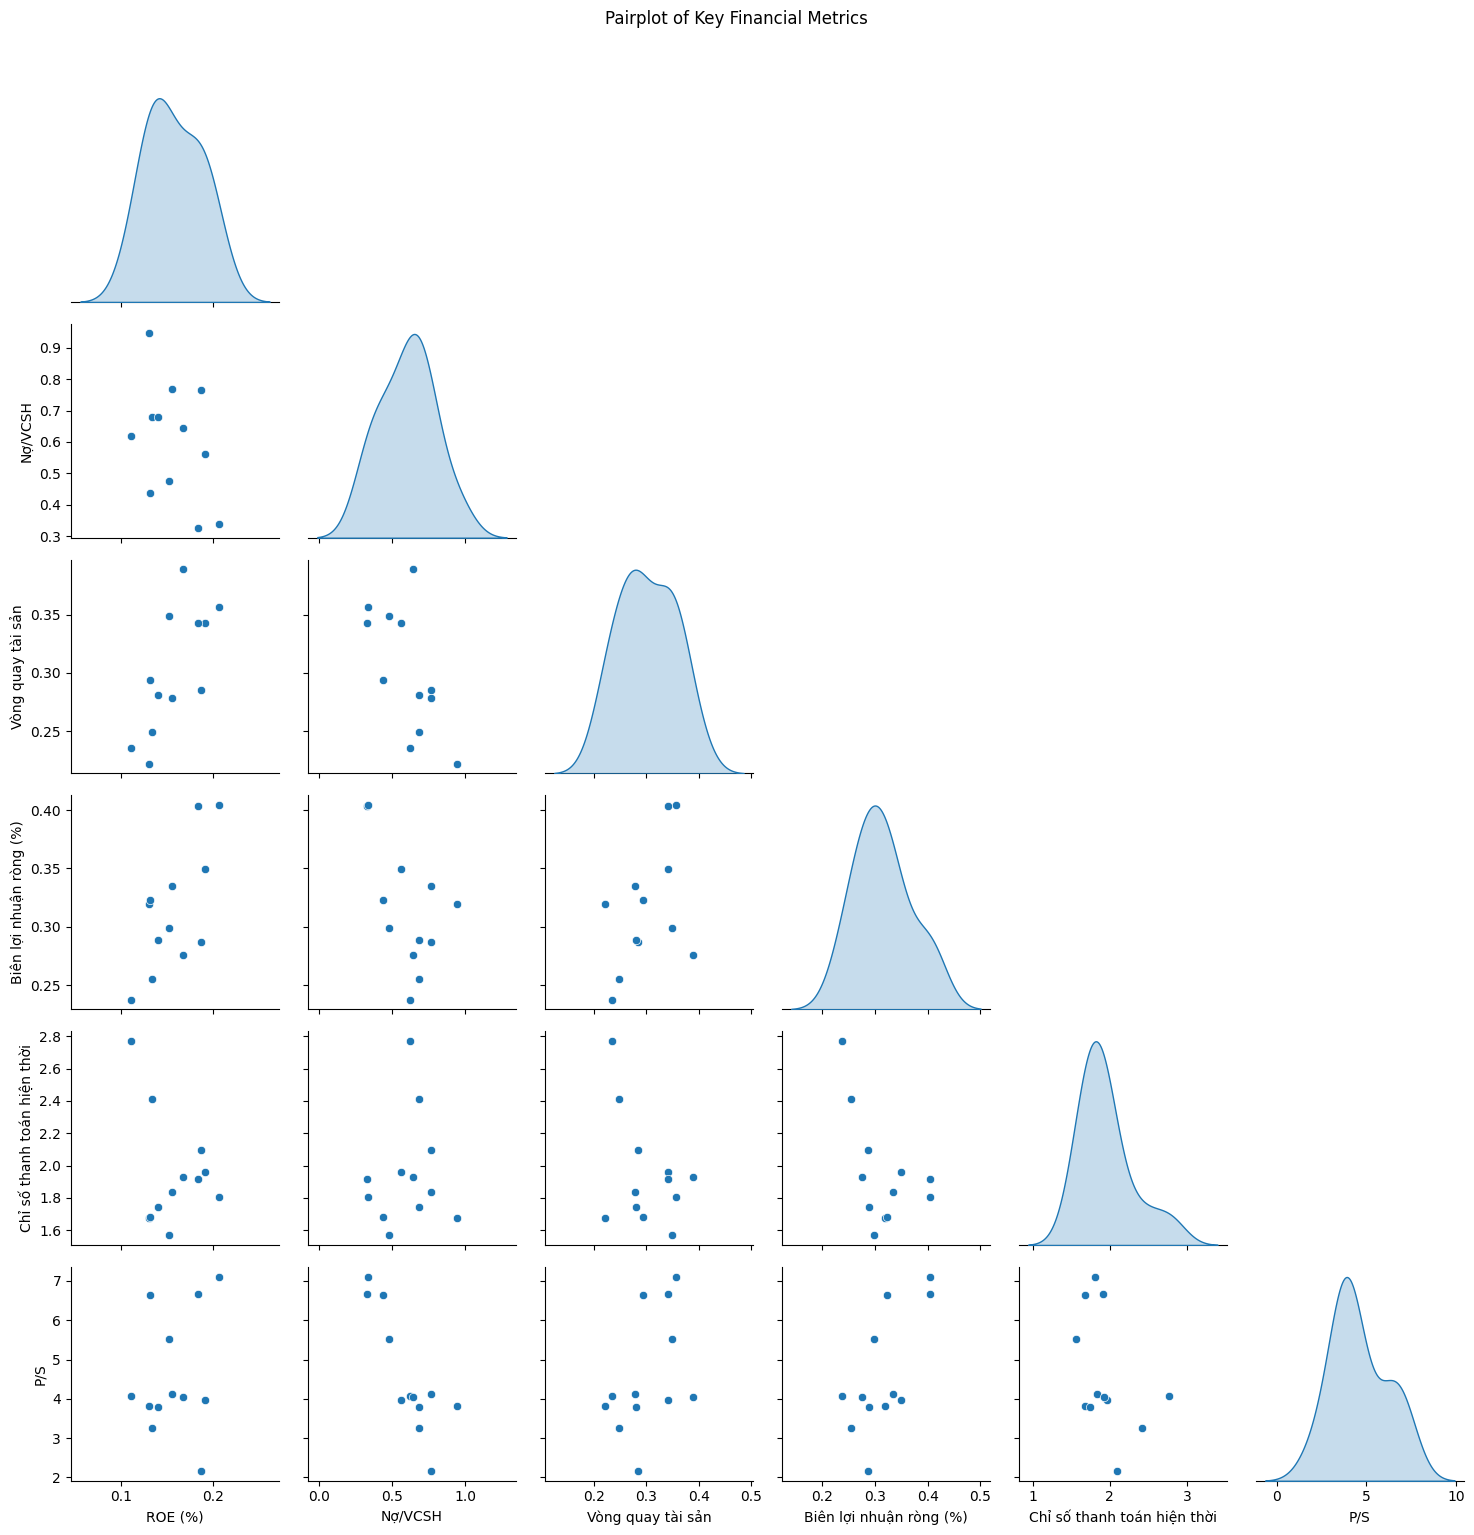

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the five most meaningful metrics (six columns for all pairwise relationships)
selected_cols = [
    ('Chỉ tiêu khả năng sinh lợi', 'ROE (%)'),
    ('Chỉ tiêu cơ cấu nguồn vốn', 'Nợ/VCSH'),
    ('Chỉ tiêu hiệu quả hoạt động', 'Vòng quay tài sản'),
    ('Chỉ tiêu khả năng sinh lợi', 'Biên lợi nhuận ròng (%)'),
    ('Chỉ tiêu thanh khoản', 'Chỉ số thanh toán hiện thời'),
    ('Chỉ tiêu định giá', 'P/S'),
]

# Subset the DataFrame
df_pair = Ratio[selected_cols].copy()

# Use only the second part of each column tuple (the metric name)
df_pair.columns = [col[1] for col in df_pair.columns]

# Optional: Remove rows with missing values for these columns
#df_pair = df_pair.dropna()

# Create the pairplot
sns.pairplot(df_pair, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Financial Metrics', y=1.02)
plt.tight_layout()
plt.show()

### Transform the balance sheet from long format to wide format. 

In [11]:
def BS_wide(stock=None):
    """
    Transform balance sheet data into a wide format with years as columns and metrics as rows.
    
    Parameters:
    -----------
    stock : object, default=None
        The stock ticker object containing financial data.
        If None, will create a default stock object for REE from VCI source.
    
    Returns:
    --------
    pandas.DataFrame
        Transformed balance sheet with years as columns and financial metrics as rows
    """
    
    # Create default stock object if not provided
    if stock is None:
        stock = Vnstock().stock(symbol= symbol, source='VCI')
    
    # Get the balance sheet data
    BS = stock.finance.balance_sheet(period='year', lang='en', dropna=True)
    
    # Transpose the DataFrame
    BS_wide = BS.T
    
    # Promote header by setting column names using the second row (index 1)
    BS_wide.columns = BS_wide.iloc[1]
    
    # Keep only the data rows (skip the first 3 rows)
    BS_wide = BS_wide.iloc[3:]
    
    return BS_wide

In [12]:
# BS_wide(stock)

In [13]:
BalanceSheet = stock.finance.balance_sheet(period='year', lang='en', dropna=True)
BalanceSheet_Transposed = BalanceSheet.T
BalanceSheet_Transposed.columns = BalanceSheet_Transposed.iloc[1]
BalanceSheet_Transposed = BalanceSheet_Transposed.iloc[3:]


### Transform Income statement from long format to wide format. 

In [14]:
IncomeStatement = stock.finance.income_statement(period='year', lang='en', dropna=True)
IncomeStatement_Transpose= IncomeStatement.T
IncomeStatement_Transpose.columns = IncomeStatement_Transpose.iloc[1]
IncomeStatement_Transpose = IncomeStatement_Transpose.iloc[3:]


In [15]:
from vnstock import Vnstock
import warnings
warnings.filterwarnings("ignore")
company = Vnstock().stock(symbol=symbol, source='TCBS').company


2025-05-21 22:57:50 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.


In [16]:
# Levered Free Cash Flow (accounts for debt repayments/receipts)
CashFlow['Levered Free Cash Flow'] = (
    CashFlow['Net cash inflows/outflows from operating activities'] 
    - CashFlow['Purchase of fixed assets']
    + CashFlow['Proceeds from disposal of fixed assets']
    - (CashFlow['Repayment of borrowings'] - CashFlow['Proceeds from borrowings'])
)

In [17]:
dividend_coverage_ratio = CashFlow['Levered Free Cash Flow'] / CashFlow['Dividends paid'].abs()

# Using Market value cost of debt

In [18]:
# Step 1: Get book values from Balance Sheet
short_term_debt = BalanceSheet['Short-term borrowings (Bn. VND)']
long_term_debt = BalanceSheet['Long-term borrowings (Bn. VND)']
total_debt = short_term_debt + long_term_debt
book_equity = BalanceSheet["OWNER'S EQUITY(Bn.VND)"]

# Step 2: Get market values
# Market capitalization for equity
market_value_of_equity = Ratio[('Chỉ tiêu định giá', 'Vốn hóa (Tỷ đồng)')]  # Market capitalization

# Use book value of debt as a proxy for market value of debt
# (In practice, we'd prefer bond prices or yield-based valuation if available)
market_value_of_debt = total_debt

# Calculate total market capital and weights
total_market_capital = market_value_of_equity + market_value_of_debt
market_weight_of_debt = market_value_of_debt.div(total_market_capital).fillna(0)
market_weight_of_equity = market_value_of_equity.div(total_market_capital).fillna(0)

# Step 3: Market-based cost of debt
# Option 1: If you have specific bond yield data (example values)
# In reality, this would vary by company or be derived from external data sources
base_interest_rate = 0.04  # e.g., Vietnamese government bond rate
credit_spread = 0.03       # Credit spread based on company rating
company_bond_yield = base_interest_rate + credit_spread  # = 0.05 (5%)

# Option 2: Use credit rating to determine yield (if available)
# This would be a mapping from credit ratings to yields
# rating_to_yield = {'AAA': 0.035, 'AA': 0.04, 'A': 0.045, 'BBB': 0.05, 'BB': 0.06, 'B': 0.07}
# company_bond_yield = rating_to_yield.get(company_rating, 0.05)  # Default to 5% if rating unknown

# Use fixed rate for simplicity (you would replace this with company-specific data)
market_cost_of_debt = 0.07  # 7% bond yield

# Apply tax shield
statutory_tax_rate = 0.12  # Vietnamese corporate tax rate
after_tax_market_cost_of_debt = market_cost_of_debt * (1 - statutory_tax_rate)

# Step 4: Cost of Equity using CAPM
risk_free_rate = 0.03  # Vietnamese government bond yield

# Option 1: If you have beta data from external sources
# estimated_beta = external_beta_data  # This would be company-specific

# Option 2: Estimate beta using financial leverage
financial_leverage = Ratio[('Chỉ tiêu thanh khoản', 'Đòn bẩy tài chính')]
leverage_mean = financial_leverage.mean()
estimated_beta = 1.0 * financial_leverage.div(leverage_mean).fillna(1.0)  # Default to 1.0 if issues

# Market risk premium
market_risk_premium = 0.05  # Estimated risk premium for Vietnamese market

# Calculate cost of equity using CAPM
cost_of_equity = risk_free_rate + (estimated_beta * market_risk_premium)

# Step 5: Calculate market-based WACC
wacc_market_based = (market_weight_of_debt * after_tax_market_cost_of_debt) + (market_weight_of_equity * cost_of_equity)

# Create a DataFrame with the results
result_df = pd.DataFrame({
    'ticker': BalanceSheet['ticker'],
    'yearReport': BalanceSheet['yearReport'],
    'market_cap': market_value_of_equity,
    'market_debt': market_value_of_debt,
    'market_weight_of_debt': market_weight_of_debt,
    'market_weight_of_equity': market_weight_of_equity,
    'market_cost_of_debt': after_tax_market_cost_of_debt,
    'beta': estimated_beta,
    'cost_of_equity': cost_of_equity,
    'wacc_market_based': wacc_market_based
})

# Display first few rows to check the results
print("Market-Based WACC Calculation Results:")
print(result_df[['ticker', 'yearReport', 'wacc_market_based']].head())


# Calculate average
avg_wacc_by_year = result_df['wacc_market_based'].mean()
print("\nAverage Market-Based WACC by Year:")
print(avg_wacc_by_year)


Market-Based WACC Calculation Results:
  ticker  yearReport  wacc_market_based
0    REE        2024           0.076080
1    REE        2023           0.076611
2    REE        2022           0.076610
3    REE        2021           0.080471
4    REE        2020           0.078101

Average Market-Based WACC by Year:
0.0762063628723774


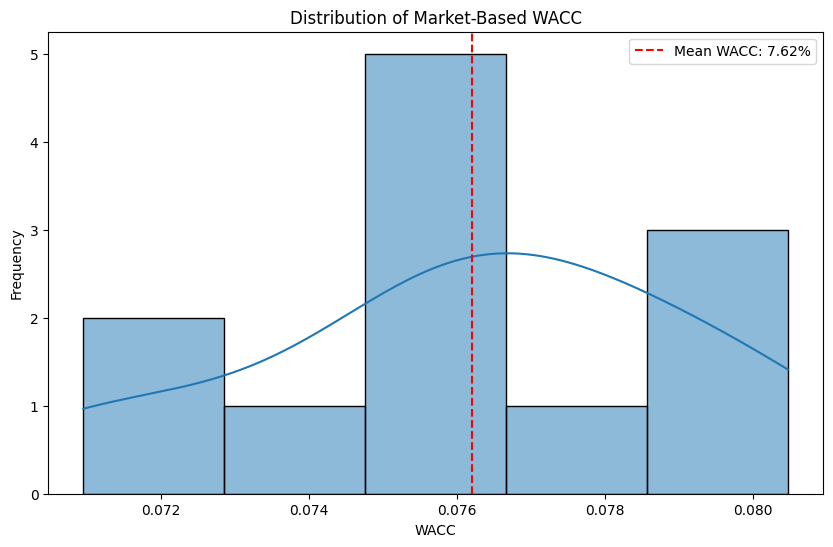

In [19]:

# Optional: Visualize the distribution of market-based WACC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(result_df['wacc_market_based'].dropna(), kde=True)
plt.title('Distribution of Market-Based WACC')
plt.xlabel('WACC')
plt.ylabel('Frequency')
plt.axvline(result_df['wacc_market_based'].mean(), color='red', linestyle='--', 
            label=f'Mean WACC: {result_df["wacc_market_based"].mean():.2%}')
plt.legend()
plt.show()



In [20]:
import plotly.graph_objects as go
import numpy as np
from scipy import stats

# Calculate statistics for annotations
wacc_data = result_df['wacc_market_based'].dropna()
wacc_mean = wacc_data.mean()
wacc_median = wacc_data.median()

# Create a figure
fig = go.Figure()

# Add the histogram with custom styling
fig.add_trace(go.Histogram(
    x=wacc_data,
    nbinsx=15,
    name='WACC Distribution',
    histnorm='probability density',
    marker=dict(
        color='rgba(66, 135, 245, 0.7)',
        line=dict(color='rgba(33, 69, 123, 1)', width=1)
    ),
    opacity=0.8
))

# Generate KDE curve manually
kde = stats.gaussian_kde(wacc_data)
x_range = np.linspace(wacc_data.min(), wacc_data.max(), 100)
y_kde = kde(x_range)

# Add the KDE curve
fig.add_trace(go.Scatter(
    x=x_range,
    y=y_kde,
    mode='lines',
    name='Density',
    line=dict(color='rgba(236, 72, 72, 1)', width=3),
))

# Add vertical line for mean
fig.add_vline(
    x=wacc_mean,
    line_width=2,
    line_dash="dash",
    line_color="rgba(236, 72, 72, 1)",
    annotation_text=f"Mean: {wacc_mean:.2%}",
    annotation_position="top right",
    annotation_font_color="rgba(236, 72, 72, 1)",
    annotation_font_size=14
)

# Add vertical line for median
fig.add_vline(
    x=wacc_median,
    line_width=2,
    line_dash="dot",
    line_color="rgba(46, 167, 76, 1)",
    annotation_text=f"Median: {wacc_median:.2%}",
    annotation_position="top left",
    annotation_font_color="rgba(46, 167, 76, 1)",
    annotation_font_size=14
)

# Update layout with modern styling
fig.update_layout(
    title={
        'text': '<b>Distribution of Market-Based WACC</b>',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='#303030')
    },
    xaxis_title={
        'text': '<b>WACC</b>',
        'font': dict(size=16)
    },
    yaxis_title={
        'text': '<b>Density</b>',
        'font': dict(size=16)
    },
    template='plotly_white',
    hovermode='x unified',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    ),
    legend=dict(
        x=0.02,
        y=0.98,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='rgba(0, 0, 0, 0.1)',
        borderwidth=1
    ),
    margin=dict(l=80, r=80, t=100, b=80),
    plot_bgcolor='rgba(248, 249, 250, 1)',
    paper_bgcolor='rgba(248, 249, 250, 1)',
    xaxis=dict(
        tickformat='.1%',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(211, 211, 211, 0.4)',
        zeroline=False
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(211, 211, 211, 0.4)',
        zeroline=False
    ),
    width=900,
    height=600
)

# Add annotations for statistical insights
fig.add_annotation(
    x=0.02,
    y=-0.17,
    xref="paper",
    yref="paper",
    text=f"<b>WACC Statistics:</b> Mean: {wacc_mean:.2%} | Median: {wacc_median:.2%} | Min: {wacc_data.min():.2%} | Max: {wacc_data.max():.2%} | StdDev: {wacc_data.std():.2%}",
    showarrow=False,
    font=dict(size=12, color="#505050"),
    align="left",
    bordercolor="#d3d3d3",
    borderwidth=1,
    borderpad=8,
    bgcolor="rgba(250, 250, 250, 0.9)",
    opacity=0.9
)

# Show the figure
fig.show()

In [21]:
import pandas as pd
import numpy as np

def dcf_time_series(df, cash_flow_col, date_col, discount_rate, base_date=None):
    """
    Calculate DCF using a pandas DataFrame with dates.
    
    Parameters:
    df (DataFrame): DataFrame containing cash flows and dates
    cash_flow_col (str): Column name for cash flows
    date_col (str): Column name for dates
    discount_rate (float): Annual discount rate
    base_date (datetime, optional): Base date for discounting, defaults to min date
    
    Returns:
    float: Present value of cash flows
    """
    # Ensure dates are datetime objects
    df[date_col] = pd.to_datetime(df[date_col])
    
    if base_date is None:
        base_date = df[date_col].min()
    
    # Calculate years from base date
    df['years'] = (df[date_col] - base_date).dt.days / 365.25
    
    # Calculate discount factors
    df['discount_factor'] = 1 / (1 + discount_rate) ** df['years']
    
    # Calculate present values
    df['present_value'] = df[cash_flow_col] * df['discount_factor']
    
    return df['present_value'].sum()

In [22]:
import pandas as pd

def full_dcf_model(projected_fcf, terminal_growth_rate, wacc, terminal_year):
    """
    Simple DCF model to calculate enterprise value.

    :param projected_fcf: List of projected free cash flows for each forecast year.
    :param terminal_growth_rate: Growth rate applied after the forecast period.
    :param wacc: Weighted Average Cost of Capital used as the discount rate.
    :param terminal_year: Number of years in the forecast period.
    :return: Calculated enterprise value.
    """
    # Calculate the PV of projected cash flows
    present_value_fcf = sum(fcf / ((1 + wacc) ** (i + 1)) for i, fcf in enumerate(projected_fcf))
    
    # Calculate the terminal value
    last_year_fcf = projected_fcf[-1]
    terminal_value = last_year_fcf * (1 + terminal_growth_rate) / (wacc - terminal_growth_rate)
    
    # Present value of the terminal value
    present_value_terminal = terminal_value / ((1 + wacc) ** terminal_year)
    
    # Total enterprise value is the sum of the PV of FCF and PV of terminal value
    enterprise_value = present_value_fcf + present_value_terminal
    
    return enterprise_value

# Ensure CashFlow is a properly defined DataFrame with 'Levered Free Cash Flow'
# Example setup, ensure that 'CashFlow' exists with your data
# CashFlow = pd.DataFrame({'Levered Free Cash Flow': [...]})

# Extract the free cash flow for the stock
free_cash_flow = CashFlow['Levered Free Cash Flow']

# Determine whether to use the mean or a specific value of FCF
# Calculate the mean directly if there are multiple entries for the stock
ticker_fcf = free_cash_flow.mean() if len(free_cash_flow) > 1 else free_cash_flow.iloc[0]

# Define your parameters
forecast_years = 5
terminal_growth_rate = 0.03  # Long-term growth rate
growth_rates = [0.05, 0.06, 0.07, 0.05, 0.04]  # Growth rates for next 5 years

# Retrieve WACC for this single stock from a relevant DataFrame
# Ensure result_df is properly defined
# result_df = pd.DataFrame({'wacc_market_based': [...]})
ticker_wacc = result_df['wacc_market_based'].mean()  # Ensure result_df is defined and contains 'wacc_market_based'

# Project future cash flows
projected_fcf = []
for i, growth in enumerate(growth_rates):
    if i == 0:
        projected_fcf.append(ticker_fcf * (1 + growth))
    else:
        projected_fcf.append(projected_fcf[i-1] * (1 + growth))

# Calculate enterprise value for the single stock
ev = full_dcf_model(projected_fcf, terminal_growth_rate, ticker_wacc, terminal_year=forecast_years)

# Store the results
enterprise_values = {
    'ticker': symbol,  # Replace 'YOUR_TICKER' with the actual stock ticker
    'wacc': ticker_wacc,
    'last_fcf': ticker_fcf,
    'enterprise_value': ev
}

# Convert to DataFrame if desired for structured display
enterprise_values_df = pd.DataFrame([enterprise_values])

# Display the result
print(enterprise_values_df)

  ticker      wacc      last_fcf  enterprise_value
0    REE  0.076206  6.620514e+12      1.642202e+14


In [23]:
#intrinsic_value = ev - net_debt / Outstanding_Shares
intrinsic_value = ev / Outstanding_Shares
print(intrinsic_value)

0     348652.990307
1     400816.487043
2     460761.503258
3     529642.147455
4     529642.147455
5     529642.147455
6     529642.147455
7     529642.147455
8     529642.147455
9     609087.506023
10    610324.084514
11    622786.157066
Name: (Chỉ tiêu định giá, Số CP lưu hành (Triệu CP)), dtype: float64


In [24]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

def create_cashflow_waterfall(df, ticker, year):
    # Filter dataframe for specific ticker and year
    data = df[(df['ticker'] == ticker) & (df['yearReport'] == year)].iloc[0]
    
    # Select components for the waterfall chart
    measures = [
        'Operating profit before changes in working capital',
        'Increase/Decrease in receivables',
        'Increase/Decrease in inventories',
        'Increase/Decrease in payables',
        'Increase/Decrease in prepaid expenses',
        'Interest paid',
        'Business Income Tax paid',
        'Other receipts from operating activities',
        'Other payments on operating activities',
        'Purchase of fixed assets',
        'Proceeds from disposal of fixed assets',
        'Investment in other entities',
        'Proceeds from divestment in other entities',
        'Gain on Dividend',
        'Increase in charter captial',
        'Payments for share repurchases',
        'Proceeds from borrowings',
        'Repayment of borrowings',
        'Dividends paid'
    ]
    
    # Extract values for these measures
    values = [data[measure] for measure in measures]
    
    # Create labels for the chart (shortened for better display)
    labels = [m.split('/')[-1].replace(' activities', '') if '/' in m else m for m in measures]
    labels = [label[:20] + '...' if len(label) > 20 else label for label in labels]
    
    # Set up measure types (relative vs total)
    measure_types = ['relative'] * len(measures)
    
    # Add initial and final cash positions
    labels = ['Initial Balance'] + labels + ['Ending Balance']
    values = [data['Cash and cash equivalents']] + values + [data['Cash and Cash Equivalents at the end of period']]
    measure_types = ['absolute'] + measure_types + ['total']
    
    # Create the waterfall chart with comma-separated numbers
    fig = go.Figure(go.Waterfall(
        name = f"Cashflow Waterfall for {ticker} ({year})",
        orientation = "v",
        measure = measure_types,
        x = labels,
        textposition = "outside",
        # Format numbers with commas as thousands separators
        text = [f"{x:,.1f}" for x in values],
        y = values,
        connector = {"line":{"color":"rgb(63, 63, 63)"}},
    ))
    
    # Update layout
    fig.update_layout(
        title = f"Cashflow Waterfall Chart for {ticker} ({year})",
        showlegend = False,
        height = 600,
        width = 1000,
        xaxis = dict(
            title = "Cash inflows/outflows",
            tickangle = 45
        ),
        yaxis = dict(
            title = "Amount",
            # Add comma separator to y-axis labels as well
            tickformat = ",.0f"
        )
    )
    
    return fig

# Example usage
# Replace 'REE' and 2024 with your desired ticker and year
cf_year = 2024

fig = create_cashflow_waterfall(CashFlow, 'REE', cf_year)
fig.show()

# If you prefer to save the figure
# fig.write_html("cashflow_waterfall.html")

In [25]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio):
    """
    Calculate ROCE and include ROE from Ratio dataframe with MultiIndex columns.
    
    Parameters:
    -----------
    BalanceSheet : pandas DataFrame
        Balance Sheet data with columns: ticker, yearReport, 'TOTAL ASSETS (Bn. VND)', 'Current liabilities (Bn. VND)'
    IncomeStatement : pandas DataFrame
        Income Statement data with columns: ticker, yearReport, 'Operating Profit/Loss'
    Ratio : pandas DataFrame
        Ratio data with MultiIndex columns including ('Chỉ tiêu khả năng sinh lợi', 'ROE (%)')
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with ROCE and ROE calculations
    """
    # Create a copy to avoid modifying the original dataframe
    BalanceSheet_copy = BalanceSheet.copy()
    
    # Step 1: Calculate Capital Employed
    BalanceSheet_copy['Capital Employed (Bn. VND)'] = (
        BalanceSheet_copy['Long-term borrowings (Bn. VND)'] + 
        BalanceSheet_copy['Short-term borrowings (Bn. VND)'] + 
        BalanceSheet_copy["OWNER'S EQUITY(Bn.VND)"]
    )
    
    # Step 2: Merge Balance Sheet and Income Statement
    merged_df = pd.merge(
        BalanceSheet_copy[['ticker', 'yearReport', 'Capital Employed (Bn. VND)']],
        IncomeStatement[['ticker', 'yearReport', 'Operating Profit/Loss']],
        on=['ticker', 'yearReport'],
        how='inner'
    )
    
    # Step 3: Calculate ROCE
    merged_df['ROCE'] = merged_df['Operating Profit/Loss'] / merged_df['Capital Employed (Bn. VND)']
    
    # Select columns for ROCE calculation
    ROCE_df = merged_df[['ticker', 'yearReport', 'Operating Profit/Loss', 
                         'Capital Employed (Bn. VND)', 'ROCE']]
    ROCE_df = ROCE_df.rename(columns={'Operating Profit/Loss': 'EBIT (Bn. VND)'})
    
    # Step 4: Create a simplified version of Ratio DataFrame for merging
    # Extract the ticker, year, and ROE columns
    ratio_simple = pd.DataFrame({
        'ticker': Ratio[('Meta', 'CP')],
        'yearReport': Ratio[('Meta', 'Năm')],
        'ROE': Ratio[('Chỉ tiêu khả năng sinh lợi', 'ROE (%)')]
    })
    
    # Step 5: Merge with simplified Ratio dataframe to include ROE
    ROCE_df = pd.merge(
        ROCE_df,
        ratio_simple[['ticker', 'yearReport', 'ROE']],
        on=['ticker', 'yearReport'],
        how='left'
    )
    
    return ROCE_df


In [26]:
def visualize_roce_vs_roe(BalanceSheet, IncomeStatement, Ratio):
    """
    Calculate and visualize the ROCE vs ROE comparison using Plotly.
    
    Parameters:
    -----------
    BalanceSheet : pandas DataFrame
        Balance Sheet data
    IncomeStatement : pandas DataFrame
        Income Statement data
    Ratio : pandas DataFrame
        Ratio data containing ROE with MultiIndex columns
        
    Returns:
    --------
    pandas DataFrame
        DataFrame containing the calculated ROCE and ROE values
    """
    # Calculate ROCE and include ROE
    ROCE_df = calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio)
    
    # Sort by ticker and year
    ROCE_df = ROCE_df.sort_values(['ticker', 'yearReport'])
    
    # Create a comparison chart for each ticker
    for ticker in ROCE_df['ticker'].unique():
        ticker_data = ROCE_df[ROCE_df['ticker'] == ticker]
        
        # Create figure with secondary y-axis
        fig = make_subplots(specs=[[{"secondary_y": True}]])
        
        # Add ROCE trace
        fig.add_trace(
            go.Scatter(
                x=ticker_data['yearReport'],
                y=ticker_data['ROCE'],
                name='ROCE',
                mode='lines+markers+text',
                text=[f"{x:.2f}" for x in ticker_data['ROCE']], 
                textposition="top center",
                line=dict(color='rgba(0, 117, 210, 0.9)', width=3),
                marker=dict(
                    size=12, 
                    color='rgba(0, 117, 210, 0.9)',
                    line=dict(color='white', width=2)
                ),
                textfont=dict(color='rgba(0, 117, 210, 1)', size=11, family="Arial Black")
            ),
            secondary_y=False,
        )
        
        # Add shaded area under ROCE for emphasis
        fig.add_trace(
            go.Scatter(
                x=ticker_data['yearReport'],
                y=ticker_data['ROCE'],
                name='ROCE Area',
                mode='none',
                fill='tozeroy',
                fillcolor='rgba(0, 117, 210, 0.1)',
                showlegend=False,
                hoverinfo='skip'
            ),
            secondary_y=False,
        )
        
        # Add ROE trace
        fig.add_trace(
            go.Scatter(
                x=ticker_data['yearReport'],
                y=ticker_data['ROE'],
                name='ROE (%)',
                mode='lines+markers+text',
                text=[f"{x:.1f}%" for x in ticker_data['ROE']],
                textposition="bottom center",
                line=dict(color='rgba(220, 20, 60, 0.9)', width=3),
                marker=dict(
                    size=12, 
                    symbol='diamond',
                    color='rgba(220, 20, 60, 0.9)',
                    line=dict(color='white', width=2)
                ),
                textfont=dict(color='rgba(220, 20, 60, 1)', size=11, family="Arial Black")
            ),
            secondary_y=True,
        )
        
        # Add shaded area under ROE for emphasis
        fig.add_trace(
            go.Scatter(
                x=ticker_data['yearReport'],
                y=ticker_data['ROE'],
                name='ROE Area',
                mode='none',
                fill='tozeroy',
                fillcolor='rgba(220, 20, 60, 0.1)',
                showlegend=False,
                hoverinfo='skip'
            ),
            secondary_y=True,
        )
        
        # Add crossover points as a special marker
        for i in range(1, len(ticker_data)):
            if ((ticker_data['ROCE'].iloc[i-1] > ticker_data['ROE'].iloc[i-1] and 
                 ticker_data['ROCE'].iloc[i] < ticker_data['ROE'].iloc[i]) or
                (ticker_data['ROCE'].iloc[i-1] < ticker_data['ROE'].iloc[i-1] and 
                 ticker_data['ROCE'].iloc[i] > ticker_data['ROE'].iloc[i])):
                
                # This is a crossover point - highlight it
                fig.add_annotation(
                    x=ticker_data['yearReport'].iloc[i],
                    y=ticker_data['ROCE'].iloc[i],
                    text="Crossover Point",
                    showarrow=True,
                    arrowhead=2,
                    arrowsize=1,
                    arrowwidth=2,
                    arrowcolor="#636363",
                    ax=0,
                    ay=-40,
                    bordercolor="#c7c7c7",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="white",
                    opacity=0.8
                )
        
        # Add figure title with ticker emphasis
        fig.update_layout(
            title={
                'text': f'<b>ROCE vs ROE Comparison</b><br><span style="font-size:16px;">{ticker}</span>',
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'
            },
            template='plotly_white',
            hovermode='x unified',
            margin=dict(t=100, b=120, l=80, r=80),
            hoverlabel=dict(
                bgcolor="white",
                font_size=12,
                font_family="Arial"
            ),
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1,
                bgcolor='rgba(255, 255, 255, 0.7)',
                bordercolor='rgba(0, 0, 0, 0.1)',
                borderwidth=1
            ),
            annotations=[
                dict(
                    x=0.5,
                    y=-0.18,
                    xref='paper',
                    yref='paper',
                    text="<b>Financial Leverage Interpretation</b><br>ROE > ROCE: Effective use of financial leverage | ROCE > ROE: Potential underutilization of debt",
                    showarrow=False,
                    font=dict(size=11, color="#505050"),
                    align="center",
                    bordercolor="#d3d3d3",
                    borderwidth=1,
                    borderpad=8,
                    bgcolor="rgba(250, 250, 250, 0.9)",
                    opacity=0.9
                )
            ]
        )
        
        # Set x-axis title and style
        fig.update_xaxes(
            title_text="<b>Year</b>",
            title_font=dict(size=14),
            showgrid=True,
            gridwidth=1,
            gridcolor='rgba(211, 211, 211, 0.4)',
            showline=True,
            linewidth=2,
            linecolor='rgba(0, 0, 0, 0.3)',
            tickangle=45,
            tickfont=dict(size=12)
        )
        
        # Set y-axes titles and styles
        fig.update_yaxes(
            title_text="<b>ROCE</b>",
            title_font=dict(size=14, color='rgba(0, 117, 210, 1)'),
            showgrid=True,
            gridwidth=1, 
            gridcolor='rgba(211, 211, 211, 0.4)',
            showline=True,
            linewidth=2, 
            linecolor='rgba(0, 117, 210, 0.7)',
            tickformat='.3f',
            tickfont=dict(size=12),
            secondary_y=False
        )
        
        fig.update_yaxes(
            title_text="<b>ROE (%)</b>",
            title_font=dict(size=14, color='rgba(220, 20, 60, 1)'),
            showgrid=False,
            showline=True, 
            linewidth=2, 
            linecolor='rgba(220, 20, 60, 0.7)',
            tickformat='.1f',
            ticksuffix='%',
            tickfont=dict(size=12),
            secondary_y=True
        )
        
        # Add background color gradients
        fig.update_layout(
            plot_bgcolor='rgba(248, 249, 250, 1)',
            paper_bgcolor='rgba(248, 249, 250, 1)',
            width=1000,
            height=650
        )
        
        # Add a watermark or logo in the corner (optional)
        fig.add_annotation(
            x=1.0,
            y=-0.12,
            xref='paper',
            yref='paper',
            text="Financial Analysis",
            showarrow=False,
            font=dict(size=10, color="rgba(150, 150, 150, 0.5)"),
            align="right",
        )
        
        fig.show()
    
    return ROCE_df

In [27]:
# Calculate ROCE and ROE
ROCE_df = calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio)
print(ROCE_df.head())

# Visualize ROCE vs ROE comparison
visualize_roce_vs_roe(BalanceSheet, IncomeStatement, Ratio)

  ticker  yearReport  EBIT (Bn. VND)  Capital Employed (Bn. VND)      ROCE  \
0    REE        2024   2672346972019              32851827291499  0.081345   
1    REE        2023   3042127311430              31512920183225  0.096536   
2    REE        2022   3985852232731              30604777639150  0.130236   
3    REE        2021   2387222069978              28331835703693  0.084259   
4    REE        2020   1901472471574              17811997377269  0.106752   

        ROE  
0  0.110077  
1  0.133335  
2  0.186927  
3  0.129860  
4  0.139663  


,ticker,yearReport,EBIT (Bn. VND),Capital Employed (Bn. VND),ROCE,ROE
11,REE,2013,653760115839,5719506891415,0.114304,0.207349
10,REE,2014,1209735776640,7049054886482,0.171617,0.184132
9,REE,2015,1038784287138,7674056085377,0.135363,0.131029
8,REE,2016,1368547876590,9214832267594,0.148516,0.151795
7,REE,2017,1711671841121,11674003426931,0.146623,0.167790
6,REE,2018,2105657869033,13109757690307,0.160618,0.191602
5,REE,2019,1909681072333,16728479197464,0.114157,0.155862
4,REE,2020,1901472471574,17811997377269,0.106752,0.139663
3,REE,2021,2387222069978,28331835703693,0.084259,0.129860
2,REE,2022,3985852232731,30604777639150,0.130236,0.186927


# Corporate Finance

In [28]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Get the years from both DataFrames
ratio_years = Ratio[('Meta', 'Năm')].astype(int).values
result_years = result_df['yearReport'].astype(int).values

# Find common years
common_years = sorted(list(set(ratio_years).intersection(set(result_years))))

# Filter and sort both DataFrames by common years
ratio_filtered = Ratio[Ratio[('Meta', 'Năm')].astype(int).isin(common_years)]
ratio_filtered = ratio_filtered.sort_values(('Meta', 'Năm'))

result_filtered = result_df[result_df['yearReport'].astype(int).isin(common_years)]
result_filtered = result_filtered.sort_values('yearReport')

# Calculate values using the filtered and aligned data
wacc_mean = result_filtered['wacc_market_based'].mean() * 100
roic_values = ratio_filtered[('Chỉ tiêu khả năng sinh lợi', 'ROIC (%)')] * 100
wacc_values = result_filtered['wacc_market_based'] * 100

# Create the figure
fig = go.Figure()

# Add ROIC line
fig.add_trace(go.Scatter(
    x=ratio_filtered[('Meta', 'Năm')],
    y=roic_values,
    name='ROIC (%)',
    line=dict(color='blue')
))

# Add WACC line
fig.add_trace(go.Scatter(
    x=result_filtered['yearReport'],
    y=wacc_values,
    name='WACC (%)',
    line=dict(color='green')
))

# Add horizontal line at WACC mean
fig.add_hline(
    y=wacc_mean,
    line_dash="dash",
    line_color="red",
    annotation_text=f"WACC Mean: {wacc_mean:.2f}%",
    annotation_position="bottom right"
)

# Only add shaded area if we have data points
if len(roic_values) > 0:
    # Create x values for the shaded area
    x_combined = np.concatenate([ratio_filtered[('Meta', 'Năm')], ratio_filtered[('Meta', 'Năm')][::-1]])
    y_upper = np.where(roic_values > wacc_mean, roic_values, wacc_mean)
    y_lower = np.full_like(roic_values, wacc_mean)
    y_combined = np.concatenate([y_upper, y_lower[::-1]])

    # Add the shaded area
    fig.add_trace(go.Scatter(
        x=x_combined,
        y=y_combined,
        fill='toself',
        fillcolor='rgba(0, 100, 255, 0.2)',
        line=dict(width=0),
        showlegend=True,
        name='Economic Value',
        legendgroup='economic_value',
        hoverinfo='skip'
    ))

# Add Economic Value annotation in upper left corner
fig.add_annotation(
    x=0.02,  # Left side
    y=0.95,  # Top side
    xref="paper",  # Use paper coordinates (0-1)
    yref="paper",  # Use paper coordinates (0-1)
    text="<b>Economic Value</b>",
    showarrow=False,
    font=dict(
        size=12,
        color="blue"
    ),
    bgcolor='rgba(0, 100, 255, 0.2)',  # Same as fill color
    bordercolor="blue",
    borderwidth=1,
    borderpad=4,
    opacity=0.8,
    xanchor="left",  # Left-align the text
    yanchor="top"    # Anchor at the top
)

# Update layout with legend at bottom
fig.update_layout(
    title='ROIC (%) vs WACC (%) with Economic Value Zone',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    showlegend=True,
    template='plotly_white',
    hovermode='x unified',
    margin=dict(t=50, l=50, r=50, b=80),  # Added more bottom margin for legend
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.3,  # Position below the x-axis
        xanchor="center",
        x=0.5,   # Center the legend
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='rgba(0, 0, 0, 0.2)',
        borderwidth=1
    )
)

# Show the plot
fig.show()

# Create a combined layout with subplots. 

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import os

# Define the function to calculate ROCE and include ROE from Ratio dataframe
def calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio):
    """
    Calculate ROCE and include ROE from Ratio dataframe with MultiIndex columns.
    """
    # Create a copy to avoid modifying the original dataframe
    BalanceSheet_copy = BalanceSheet.copy()
    
    # Step 1: Calculate Capital Employed
    BalanceSheet_copy['Capital Employed (Bn. VND)'] = (
        BalanceSheet_copy['Long-term borrowings (Bn. VND)'] + 
        BalanceSheet_copy['Short-term borrowings (Bn. VND)'] + 
        BalanceSheet_copy["OWNER'S EQUITY(Bn.VND)"]
    )
    
    # Step 2: Merge Balance Sheet and Income Statement
    merged_df = pd.merge(
        BalanceSheet_copy[['ticker', 'yearReport', 'Capital Employed (Bn. VND)']],
        IncomeStatement[['ticker', 'yearReport', 'Operating Profit/Loss']],
        on=['ticker', 'yearReport'],
        how='inner'
    )
    
    # Step 3: Calculate ROCE
    merged_df['ROCE'] = merged_df['Operating Profit/Loss'] / merged_df['Capital Employed (Bn. VND)']
    
    # Select columns for ROCE calculation
    ROCE_df = merged_df[['ticker', 'yearReport', 'Operating Profit/Loss', 
                         'Capital Employed (Bn. VND)', 'ROCE']]
    ROCE_df = ROCE_df.rename(columns={'Operating Profit/Loss': 'EBIT (Bn. VND)'})
    
    # Step 4: Create a simplified version of Ratio DataFrame for merging
    # Extract the ticker, year, and ROE columns
    ratio_simple = pd.DataFrame({
        'ticker': Ratio[('Meta', 'CP')],
        'yearReport': Ratio[('Meta', 'Năm')],
        'ROE': Ratio[('Chỉ tiêu khả năng sinh lợi', 'ROE (%)')]
    })
    
    # Step 5: Merge with simplified Ratio dataframe to include ROE
    ROCE_df = pd.merge(
        ROCE_df,
        ratio_simple[['ticker', 'yearReport', 'ROE']],
        on=['ticker', 'yearReport'],
        how='left'
    )
    
    return ROCE_df

# Define function for DuPont analysis
def create_dupont_analysis(IncomeStatement, BalanceSheet, CashFlow):
    """
    Create a 3-factor DuPont analysis based on the three financial statements.
    
    DuPont Analysis: ROE = Net Profit Margin × Asset Turnover × Financial Leverage
    
    Where:
    - Net Profit Margin = Net Income / Revenue
    - Asset Turnover = Revenue / Average Total Assets
    - Financial Leverage = Average Total Assets / Average Shareholders' Equity
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with DuPont analysis results
    """
    # Step 1: Combine necessary data from all three statements
    # Start with Income Statement data for revenue and net income
    income_data = IncomeStatement[['ticker', 'yearReport', 'Revenue (Bn. VND)', 'Attribute to parent company (Bn. VND)']].copy()
    
    # Rename for clarity
    income_data = income_data.rename(columns={'Attribute to parent company (Bn. VND)': 'Net Income (Bn. VND)'})
    
    # Step 2: Add Balance Sheet data for assets and equity
    balance_data = BalanceSheet[['ticker', 'yearReport', 'TOTAL ASSETS (Bn. VND)', "OWNER'S EQUITY(Bn.VND)"]].copy()
    
    # Merge the dataframes
    dupont_df = pd.merge(income_data, balance_data, on=['ticker', 'yearReport'], how='inner')
    
    # Step 3: Group by ticker to calculate year-over-year values and averages
    # Sort by ticker and year
    dupont_df = dupont_df.sort_values(['ticker', 'yearReport'])
    
    # Calculate average total assets and equity for each year (current + previous year) / 2
    # First create shifted columns for previous year's values
    dupont_df['Prev_Assets'] = dupont_df.groupby('ticker')['TOTAL ASSETS (Bn. VND)'].shift(1)
    dupont_df['Prev_Equity'] = dupont_df.groupby('ticker')["OWNER'S EQUITY(Bn.VND)"].shift(1)
    
    # Calculate averages
    dupont_df['Average Total Assets (Bn. VND)'] = (dupont_df['TOTAL ASSETS (Bn. VND)'] + dupont_df['Prev_Assets']) / 2
    dupont_df['Average Equity (Bn. VND)'] = (dupont_df["OWNER'S EQUITY(Bn.VND)"] + dupont_df['Prev_Equity']) / 2
    
    # For the first year of each ticker, we don't have previous year data, so use current year
    dupont_df['Average Total Assets (Bn. VND)'] = dupont_df['Average Total Assets (Bn. VND)'].fillna(
        dupont_df['TOTAL ASSETS (Bn. VND)'])
    dupont_df['Average Equity (Bn. VND)'] = dupont_df['Average Equity (Bn. VND)'].fillna(
        dupont_df["OWNER'S EQUITY(Bn.VND)"])
    
    # Step 4: Calculate the 3 DuPont components
    # Net Profit Margin = Net Income / Revenue
    dupont_df['Net Profit Margin'] = dupont_df['Net Income (Bn. VND)'] / dupont_df['Revenue (Bn. VND)']
    
    # Asset Turnover = Revenue / Average Total Assets
    dupont_df['Asset Turnover'] = dupont_df['Revenue (Bn. VND)'] / dupont_df['Average Total Assets (Bn. VND)']
    
    # Financial Leverage = Average Total Assets / Average Equity
    dupont_df['Financial Leverage'] = dupont_df['Average Total Assets (Bn. VND)'] / dupont_df['Average Equity (Bn. VND)']
    
    # Step 5: Calculate ROE using DuPont formula
    dupont_df['ROE (DuPont)'] = dupont_df['Net Profit Margin'] * dupont_df['Asset Turnover'] * dupont_df['Financial Leverage']
    
    # Step 6: Calculate ROE directly for validation
    dupont_df['ROE (Direct)'] = dupont_df['Net Income (Bn. VND)'] / dupont_df['Average Equity (Bn. VND)']
    
    # Step 7: Clean up the DataFrame and select relevant columns
    dupont_analysis = dupont_df[[
        'ticker', 'yearReport', 
        'Net Income (Bn. VND)', 'Revenue (Bn. VND)',
        'Average Total Assets (Bn. VND)', 'Average Equity (Bn. VND)',
        'Net Profit Margin', 'Asset Turnover', 'Financial Leverage',
        'ROE (DuPont)', 'ROE (Direct)'
    ]]
    
    # Convert ratios to percentages for better readability
    dupont_analysis['Net Profit Margin'] = dupont_analysis['Net Profit Margin'] * 100
    dupont_analysis['ROE (DuPont)'] = dupont_analysis['ROE (DuPont)'] * 100
    dupont_analysis['ROE (Direct)'] = dupont_analysis['ROE (Direct)'] * 100
    
    # Round values for better display
    dupont_analysis = dupont_analysis.round({
        'Net Profit Margin': 2,
        'Asset Turnover': 2,
        'Financial Leverage': 2,
        'ROE (DuPont)': 2,
        'ROE (Direct)': 2
    })
    
    return dupont_analysis

# Create a new layout with 4 rows (3 separate charts for DuPont analysis)
fig = make_subplots(
    rows=5, 
    cols=2,
    subplot_titles=(
        'Net Operating Cashflow', 
        'ROIC (%) vs WACC (%) with Economic Value Zone',
        'Cashflow Waterfall',
        'ROCE vs ROE Comparison',
        'DuPont Analysis: Net Profit Margin (%)',  # Row 3, Col 1
        'DuPont Analysis: Asset Turnover',         # Row 3, Col 2
        'DuPont Analysis: Financial Leverage',     # Row 4, Col 1
        'DuPont Analysis: ROE (DuPont) vs ROE (Direct)'  # Row 4, Col 2
    ),
    specs=[
        [{"type": "xy"}, {"type": "xy"}],
        [{"type": "waterfall"}, {"type": "xy", "secondary_y": True}],
        [{"type": "xy"}, {"type": "xy"}],  # Row 3: Net Profit Margin, Asset Turnover
        [{"type": "xy"}, {"type": "xy"}],  # Row 4: Financial Leverage, ROE Comparison
        [{"type": "xy", "colspan": 2}, None]  # Row 5: Empty row for spacing
    ],
    vertical_spacing=0.07,  # Reduced spacing for more compact layout
    horizontal_spacing=0.08
)

# Get unique years from CashFlow
years = sorted(CashFlow['yearReport'].unique())

# Ensure years are integers for comparison operations
years = [int(y) if isinstance(y, str) else y for y in years]

# 1. Net Operating Cashflow (Bar Chart) - Top Left
# For each year, calculate the average Net cash inflows/outflows from operating activities
ocf_data = CashFlow.groupby('yearReport')['Net cash inflows/outflows from operating activities'].mean() / 1000  # Convert to billions
ocf_years = ocf_data.index.tolist()
ocf_values = ocf_data.values.tolist()

# Add bar chart
fig.add_trace(
    go.Bar(
        x=ocf_years,
        y=ocf_values,
        text=[f'{v:.2f}B' for v in ocf_values],
        textposition='outside',
        marker_color='rgb(66, 135, 245)',
        marker_line_color='lightgrey',
        marker_line_width=1.5,
        opacity=0.8,
        name='Net Operating Cash Flow'
    ),
    row=1, col=1
)

# 2. ROIC vs WACC Chart with Economic Value Zone - Top Right
# Get the years from both DataFrames
ratio_years = Ratio[('Meta', 'Năm')].values
# Convert to int if they're strings
ratio_years = [int(y) if isinstance(y, str) else y for y in ratio_years]

result_years = result_df['yearReport'].values
# Convert to int if they're strings
result_years = [int(y) if isinstance(y, str) else y for y in result_years]

# Find common years
common_years = sorted(list(set(ratio_years).intersection(set(result_years))))

# Filter and sort both DataFrames by common years
# Ensure comparison works correctly by converting to the same type
ratio_filtered = Ratio[Ratio[('Meta', 'Năm')].apply(lambda x: int(x) if isinstance(x, str) else x).isin(common_years)]
ratio_filtered = ratio_filtered.sort_values(('Meta', 'Năm'))

result_filtered = result_df[result_df['yearReport'].apply(lambda x: int(x) if isinstance(x, str) else x).isin(common_years)]
result_filtered = result_filtered.sort_values('yearReport')

# Calculate values using the filtered and aligned data
wacc_mean = result_filtered['wacc_market_based'].mean() * 100
roic_values = ratio_filtered[('Chỉ tiêu khả năng sinh lợi', 'ROIC (%)')] * 100
wacc_values = result_filtered['wacc_market_based'] * 100

# Add ROIC line
fig.add_trace(
    go.Scatter(
        x=ratio_filtered[('Meta', 'Năm')],
        y=roic_values,
        name='ROIC (%)',
        line=dict(color='blue')
    ),
    row=1, col=2
)

# Add WACC line
fig.add_trace(
    go.Scatter(
        x=result_filtered['yearReport'],
        y=wacc_values,
        name='WACC (%)',
        line=dict(color='green')
    ),
    row=1, col=2
)

# Add horizontal line at WACC mean
fig.add_shape(
    type="line",
    x0=min(common_years),
    x1=max(common_years),
    y0=wacc_mean,
    y1=wacc_mean,
    line=dict(color="red", dash="dash"),
    row=1, col=2
)

# Add WACC mean annotation
fig.add_annotation(
    x=max(common_years),
    y=wacc_mean,
    text=f"WACC Mean: {wacc_mean:.2f}%",
    showarrow=False,
    xanchor="right",
    font=dict(color="red"),
    row=1, col=2
)

# Only add shaded area if we have data points
if len(roic_values) > 0:
    # Create x values for the shaded area
    x_combined = np.concatenate([ratio_filtered[('Meta', 'Năm')].values, ratio_filtered[('Meta', 'Năm')].values[::-1]])
    y_upper = np.where(roic_values > wacc_mean, roic_values, wacc_mean)
    y_lower = np.full_like(roic_values, wacc_mean)
    y_combined = np.concatenate([y_upper, y_lower[::-1]])

    # Add the shaded area
    fig.add_trace(
        go.Scatter(
            x=x_combined,
            y=y_combined,
            fill='toself',
            fillcolor='rgba(0, 100, 255, 0.2)',
            line=dict(width=0),
            showlegend=True,
            name='Economic Value',
            legendgroup='economic_value',
            hoverinfo='skip'
        ),
        row=1, col=2
    )

# Add Economic Value annotation in upper left corner of the ROIC vs WACC plot
fig.add_annotation(
    x=0.52,  # Adjusted for subplot positioning
    y=0.97,  # Top side
    xref="paper",  # Use paper coordinates (0-1)
    yref="paper",  # Use paper coordinates (0-1)
    text="<b>Economic Value</b>",
    showarrow=False,
    font=dict(
        size=12,
        color="blue"
    ),
    bgcolor='rgba(0, 100, 255, 0.2)',  # Same as fill color
    bordercolor="blue",
    borderwidth=1,
    borderpad=4,
    opacity=0.8,
    xanchor="left",  # Left-align the text
    yanchor="top"    # Anchor at the top
)

# 3. Cashflow Waterfall - 2nd Row, Left
# Get a representative ticker (or use one specified)
ticker = CashFlow['ticker'].iloc[0]
# Get the latest year
latest_year = max(years)

# Filter data for the specific ticker and latest year
waterfall_data = CashFlow[(CashFlow['ticker'] == ticker) & 
                          (CashFlow['yearReport'] == latest_year)]

if len(waterfall_data) > 0:
    data = waterfall_data.iloc[0]
    
    # Key cashflow components with updated labels
    measures = [
        'Net Profit',  # Changed from 'Initial Cash' to 'Net Profit'
        'Operating CF',
        'Investing CF',
        'Financing CF',
        'Final Cash'
    ]
    
    # Updated values using Net Profit as the initial value
    values = [
        data['Net Profit/Loss before tax'],  # Changed to Net Profit/Loss before tax
        data['Net cash inflows/outflows from operating activities'],
        data['Net Cash Flows from Investing Activities'],
        data['Cash flows from financial activities'],
        data['Cash and Cash Equivalents at the end of period']
    ]
    
    measure_types = ['absolute', 'relative', 'relative', 'relative', 'total']
    
    # Add waterfall chart
    fig.add_trace(
        go.Waterfall(
            name=f"Cashflow {latest_year}",
            orientation="v",
            measure=measure_types,
            x=measures,
            textposition="outside",
            text=[f"{x:,.1f}" for x in values],
            y=values,
            connector={"line": {"color": "rgb(63, 63, 63)"}},
        ),
        row=2, col=1
    )

# 4. ROCE vs ROE Comparison - 2nd Row, Right
# Calculate ROCE and ROE using the provided function
ROCE_df = calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio)

# Filter for the specific ticker
ticker_data = ROCE_df[ROCE_df['ticker'] == ticker].sort_values('yearReport')

# Convert ROCE to percentage
ticker_data['ROCE_PCT'] = ticker_data['ROCE'] * 100

# Convert ROE to percentage if it's not already
# Check if ROE values are already in percentage (typically >1 if in %)
if ticker_data['ROE'].max() < 1:  # If ROE is in decimal form (e.g., 0.15 for 15%)
    ticker_data['ROE_PCT'] = ticker_data['ROE'] * 100
else:
    ticker_data['ROE_PCT'] = ticker_data['ROE']  # If already in percentage form

# Add ROCE trace (using percentage values) - REMOVED text labels
fig.add_trace(
    go.Scatter(
        x=ticker_data['yearReport'],
        y=ticker_data['ROCE_PCT'],
        name='ROCE (%)',
        mode='lines+markers',  # Removed 'text' from mode
        line=dict(color='rgba(0, 117, 210, 0.9)', width=3),
        marker=dict(
            size=10, 
            color='rgba(0, 117, 210, 0.9)',
            line=dict(color='white', width=2)
        )
    ),
    row=2, col=2,
    secondary_y=False
)

# Add shaded area under ROCE for emphasis
fig.add_trace(
    go.Scatter(
        x=ticker_data['yearReport'],
        y=ticker_data['ROCE_PCT'],
        name='ROCE Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(0, 117, 210, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=2, col=2,
    secondary_y=False
)

# Add ROE trace using percentage values - REMOVED text labels
fig.add_trace(
    go.Scatter(
        x=ticker_data['yearReport'],
        y=ticker_data['ROE_PCT'],
        name='ROE (%)',
        mode='lines+markers',  # Removed 'text' from mode
        line=dict(color='rgba(220, 20, 60, 0.9)', width=3),
        marker=dict(
            size=10, 
            symbol='diamond',
            color='rgba(220, 20, 60, 0.9)',
            line=dict(color='white', width=2)
        )
    ),
    row=2, col=2,
    secondary_y=True
)

# Add shaded area under ROE for emphasis
fig.add_trace(
    go.Scatter(
        x=ticker_data['yearReport'],
        y=ticker_data['ROE_PCT'],
        name='ROE Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(220, 20, 60, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=2, col=2,
    secondary_y=True
)

# 5. DuPont Analysis (Split into 3 separate charts)
# Calculate DuPont Analysis
dupont_analysis = create_dupont_analysis(IncomeStatement, BalanceSheet, CashFlow)

# Filter for the specific ticker
dupont_ticker_data = dupont_analysis[dupont_analysis['ticker'] == ticker].sort_values('yearReport')

# 5.1. Net Profit Margin - Row 3, Col 1
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Net Profit Margin'],
        mode='lines+markers',
        name='Net Profit Margin (%)',
        line=dict(color='rgba(66, 135, 245, 0.9)', width=3),
        marker=dict(
            size=10, 
            color='rgba(66, 135, 245, 0.9)',
            line=dict(color='white', width=2)
        ),
        showlegend=True
    ),
    row=3, col=1
)

# Add shaded area for Net Profit Margin
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Net Profit Margin'],
        name='NPM Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(66, 135, 245, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=3, col=1
)

# 5.2. Asset Turnover - Row 3, Col 2
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Asset Turnover'],
        mode='lines+markers',
        name='Asset Turnover',
        line=dict(color='rgba(0, 200, 0, 0.9)', width=3),
        marker=dict(
            size=10, 
            color='rgba(0, 200, 0, 0.9)',
            line=dict(color='white', width=2)
        ),
        showlegend=True
    ),
    row=3, col=2
)

# Add shaded area for Asset Turnover
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Asset Turnover'],
        name='AT Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(0, 200, 0, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=3, col=2
)

# 5.3. Financial Leverage - Row 4, Col 1
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Financial Leverage'],
        mode='lines+markers',
        name='Financial Leverage',
        line=dict(color='rgba(220, 20, 60, 0.9)', width=3),
        marker=dict(
            size=10, 
            color='rgba(220, 20, 60, 0.9)',
            line=dict(color='white', width=2)
        ),
        showlegend=True
    ),
    row=4, col=1
)

# Add shaded area for Financial Leverage
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Financial Leverage'],
        name='FL Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(220, 20, 60, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=4, col=1
)

# 5.4. ROE Comparison (DuPont vs Direct) - Row 4, Col 2
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['ROE (DuPont)'],
        mode='lines+markers',
        name='ROE (DuPont) (%)',
        line=dict(color='rgba(255, 165, 0, 0.9)', width=3),  # Orange color
        marker=dict(
            size=10, 
            color='rgba(255, 165, 0, 0.9)',
            line=dict(color='white', width=2)
        ),
        showlegend=True
    ),
    row=4, col=2
)

fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['ROE (Direct)'],
        mode='lines+markers',
        name='ROE (Direct) (%)',
        line=dict(color='rgba(128, 0, 128, 0.9)', width=3),  # Purple color
        marker=dict(
            size=10, 
            symbol='diamond',
            color='rgba(128, 0, 128, 0.9)',
            line=dict(color='white', width=2)
        ),
        showlegend=True
    ),
    row=4, col=2
)

# Update layout for better appearance
fig.update_layout(
    title={
        'text': f'Financial Analysis Dashboard for {ticker}',
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    template='plotly_white',
    height=1600,  # Increased height for 5 rows
    width=1200,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.12,  # Adjusted for new layout
        xanchor="center",
        x=0.5,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='rgba(0, 0, 0, 0.2)',
        borderwidth=1
    ),
    hovermode='x unified',
    margin=dict(t=100, b=150, l=80, r=80)  # Increased bottom margin
)

# Add DuPont formula annotation
fig.add_annotation(
    x=0.5,
    y=0.05,  # Positioned at the bottom section
    xref="paper",
    yref="paper",
    text="<b>DuPont Formula:</b><br>ROE = Net Profit Margin × Asset Turnover × Financial Leverage",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="center",
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="rgba(0, 0, 0, 0.2)",
    borderwidth=1,
    borderpad=4
)

# Update axes labels and settings for all plots
# Row 1
fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=years,
    row=1, 
    col=1
)

fig.update_yaxes(title_text="Value (Billions VND)", row=1, col=1)

fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=common_years,
    row=1, 
    col=2
)

fig.update_yaxes(title_text="Percentage (%)", row=1, col=2)

# Row 2
fig.update_xaxes(title_text="Cash Flow Components", tickangle=0, row=2, col=1)
fig.update_yaxes(title_text="Amount (Bn. VND)", row=2, col=1)

fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=ticker_data['yearReport'],
    row=2, 
    col=2
)

fig.update_yaxes(
    title_text="ROCE (%)",
    title_font=dict(color='rgba(0, 117, 210, 1)'),
    row=2, 
    col=2,
    secondary_y=False
)

fig.update_yaxes(
    title_text="ROE (%)",
    title_font=dict(color='rgba(220, 20, 60, 1)'),
    row=2, 
    col=2,
    secondary_y=True
)

# Row 3 - DuPont Analysis (Net Profit Margin, Asset Turnover)
fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=dupont_ticker_data['yearReport'],
    row=3, 
    col=1
)

fig.update_yaxes(
    title_text="Net Profit Margin (%)",
    title_font=dict(color='rgba(66, 135, 245, 1)'),
    row=3, 
    col=1
)

fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=dupont_ticker_data['yearReport'],
    row=3, 
    col=2
)

fig.update_yaxes(
    title_text="Asset Turnover (times)",
    title_font=dict(color='rgba(0, 200, 0, 1)'),
    row=3, 
    col=2
)

# Row 4 - DuPont Analysis (Financial Leverage, ROE Comparison)
fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=dupont_ticker_data['yearReport'],
    row=4, 
    col=1
)

fig.update_yaxes(
    title_text="Financial Leverage (times)",
    title_font=dict(color='rgba(220, 20, 60, 1)'),
    row=4, 
    col=1
)

fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=dupont_ticker_data['yearReport'],
    row=4, 
    col=2
)

fig.update_yaxes(
    title_text="ROE (%)",
    row=4, 
    col=2
)

# Update subplot titles
fig.update_annotations(
    text=f"Cashflow Waterfall ({latest_year})",
    selector={"index": 2}
)

# Improve grid appearance for better readability
for row in range(1, 5):
    for col in range(1, 3):
        fig.update_xaxes(
            showgrid=True,
            gridwidth=1,
            gridcolor='rgba(211, 211, 211, 0.4)',
            showline=True,
            linewidth=2,
            linecolor='rgba(0, 0, 0, 0.3)',
            row=row, 
            col=col
        )
        
        fig.update_yaxes(
            showgrid=True,
            gridwidth=1,
            gridcolor='rgba(211, 211, 211, 0.4)',
            showline=True,
            linewidth=2,
            linecolor='rgba(0, 0, 0, 0.3)',
            row=row, 
            col=col
        )

# Create outputs directory if it doesn't exist
output_dir = './dist'  # Changed from './outputs' to './dist'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure as an HTML file
output_path = os.path.join(output_dir, 'index.html')
fig.write_html(output_path)

print(f"Financial dashboard saved to {output_path}")

Financial dashboard saved to ./dist\index.html


In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import os



# Define the function to calculate DFL
def calculate_degree_of_financial_leverage(IncomeStatement):
    """
    Calculate Degree of Financial Leverage using percentage changes in Net Income and EBIT.
    
    DFL = % Change in Net Income / % Change in EBIT
    
    Parameters:
    -----------
    IncomeStatement : pandas DataFrame
        Income Statement data with columns including 'Operating Profit/Loss' and 'Attribute to parent company (Bn. VND)'
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with DFL calculations
    """
    # Create a copy to avoid modifying the original dataframe
    financial_leverage_data = IncomeStatement.copy()
    
    # Rename for clarity
    financial_leverage_data = financial_leverage_data.rename(columns={
        'Operating Profit/Loss': 'EBIT (Bn. VND)',
        'Attribute to parent company (Bn. VND)': 'Net Income (Bn. VND)'
    })
    
    # Sort by ticker and year
    financial_leverage_data = financial_leverage_data.sort_values(['ticker', 'yearReport'])
    
    # Calculate year-over-year percentage changes for each ticker
    financial_leverage_data['EBIT % Change'] = financial_leverage_data.groupby('ticker')['EBIT (Bn. VND)'].pct_change() * 100
    financial_leverage_data['Net Income % Change'] = financial_leverage_data.groupby('ticker')['Net Income (Bn. VND)'].pct_change() * 100
    
    # Calculate DFL
    financial_leverage_data['DFL'] = financial_leverage_data['Net Income % Change'] / financial_leverage_data['EBIT % Change']
    
    # Handle infinite or NaN values (when EBIT % Change is near zero)
    financial_leverage_data['DFL'] = financial_leverage_data['DFL'].replace([np.inf, -np.inf], np.nan)
    
    # Select relevant columns
    dfl_results = financial_leverage_data[['ticker', 'yearReport', 
                                         'EBIT (Bn. VND)', 'Net Income (Bn. VND)', 
                                         'EBIT % Change', 'Net Income % Change', 
                                         'DFL']]
    
    return dfl_results

# Define the function to calculate ROCE and include ROE from Ratio dataframe
def calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio):
    """
    Calculate ROCE and include ROE from Ratio dataframe with MultiIndex columns.
    """
    # Create a copy to avoid modifying the original dataframe
    BalanceSheet_copy = BalanceSheet.copy()
    
    # Step 1: Calculate Capital Employed
    BalanceSheet_copy['Capital Employed (Bn. VND)'] = (
        BalanceSheet_copy['Long-term borrowings (Bn. VND)'] + 
        BalanceSheet_copy['Short-term borrowings (Bn. VND)'] + 
        BalanceSheet_copy["OWNER'S EQUITY(Bn.VND)"]
    )
    
    # Step 2: Merge Balance Sheet and Income Statement
    merged_df = pd.merge(
        BalanceSheet_copy[['ticker', 'yearReport', 'Capital Employed (Bn. VND)']],
        IncomeStatement[['ticker', 'yearReport', 'Operating Profit/Loss']],
        on=['ticker', 'yearReport'],
        how='inner'
    )
    
    # Step 3: Calculate ROCE
    merged_df['ROCE'] = merged_df['Operating Profit/Loss'] / merged_df['Capital Employed (Bn. VND)']
    
    # Select columns for ROCE calculation
    ROCE_df = merged_df[['ticker', 'yearReport', 'Operating Profit/Loss', 
                         'Capital Employed (Bn. VND)', 'ROCE']]
    ROCE_df = ROCE_df.rename(columns={'Operating Profit/Loss': 'EBIT (Bn. VND)'})
    
    # Step 4: Create a simplified version of Ratio DataFrame for merging
    # Extract the ticker, year, and ROE columns
    ratio_simple = pd.DataFrame({
        'ticker': Ratio[('Meta', 'CP')],
        'yearReport': Ratio[('Meta', 'Năm')],
        'ROE': Ratio[('Chỉ tiêu khả năng sinh lợi', 'ROE (%)')]
    })
    
    # Step 5: Merge with simplified Ratio dataframe to include ROE
    ROCE_df = pd.merge(
        ROCE_df,
        ratio_simple[['ticker', 'yearReport', 'ROE']],
        on=['ticker', 'yearReport'],
        how='left'
    )
    
    return ROCE_df

# Define function for DuPont analysis
def create_dupont_analysis(IncomeStatement, BalanceSheet, CashFlow):
    """
    Create a 3-factor DuPont analysis based on the three financial statements.
    
    DuPont Analysis: ROE = Net Profit Margin × Asset Turnover × Financial Leverage
    
    Where:
    - Net Profit Margin = Net Income / Revenue
    - Asset Turnover = Revenue / Average Total Assets
    - Financial Leverage = Average Total Assets / Average Shareholders' Equity
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with DuPont analysis results
    """
    # Step 1: Combine necessary data from all three statements
    # Start with Income Statement data for revenue and net income
    income_data = IncomeStatement[['ticker', 'yearReport', 'Revenue (Bn. VND)', 'Attribute to parent company (Bn. VND)']].copy()
    
    # Rename for clarity
    income_data = income_data.rename(columns={'Attribute to parent company (Bn. VND)': 'Net Income (Bn. VND)'})
    
    # Step 2: Add Balance Sheet data for assets and equity
    balance_data = BalanceSheet[['ticker', 'yearReport', 'TOTAL ASSETS (Bn. VND)', "OWNER'S EQUITY(Bn.VND)"]].copy()
    
    # Merge the dataframes
    dupont_df = pd.merge(income_data, balance_data, on=['ticker', 'yearReport'], how='inner')
    
    # Step 3: Group by ticker to calculate year-over-year values and averages
    # Sort by ticker and year
    dupont_df = dupont_df.sort_values(['ticker', 'yearReport'])
    
    # Calculate average total assets and equity for each year (current + previous year) / 2
    # First create shifted columns for previous year's values
    dupont_df['Prev_Assets'] = dupont_df.groupby('ticker')['TOTAL ASSETS (Bn. VND)'].shift(1)
    dupont_df['Prev_Equity'] = dupont_df.groupby('ticker')["OWNER'S EQUITY(Bn.VND)"].shift(1)
    
    # Calculate averages
    dupont_df['Average Total Assets (Bn. VND)'] = (dupont_df['TOTAL ASSETS (Bn. VND)'] + dupont_df['Prev_Assets']) / 2
    dupont_df['Average Equity (Bn. VND)'] = (dupont_df["OWNER'S EQUITY(Bn.VND)"] + dupont_df['Prev_Equity']) / 2
    
    # For the first year of each ticker, we don't have previous year data, so use current year
    dupont_df['Average Total Assets (Bn. VND)'] = dupont_df['Average Total Assets (Bn. VND)'].fillna(
        dupont_df['TOTAL ASSETS (Bn. VND)'])
    dupont_df['Average Equity (Bn. VND)'] = dupont_df['Average Equity (Bn. VND)'].fillna(
        dupont_df["OWNER'S EQUITY(Bn.VND)"])
    
    # Step 4: Calculate the 3 DuPont components
    # Net Profit Margin = Net Income / Revenue
    dupont_df['Net Profit Margin'] = dupont_df['Net Income (Bn. VND)'] / dupont_df['Revenue (Bn. VND)']
    
    # Asset Turnover = Revenue / Average Total Assets
    dupont_df['Asset Turnover'] = dupont_df['Revenue (Bn. VND)'] / dupont_df['Average Total Assets (Bn. VND)']
    
    # Financial Leverage = Average Total Assets / Average Equity
    dupont_df['Financial Leverage'] = dupont_df['Average Total Assets (Bn. VND)'] / dupont_df['Average Equity (Bn. VND)']
    
    # Step 5: Calculate ROE using DuPont formula
    dupont_df['ROE (DuPont)'] = dupont_df['Net Profit Margin'] * dupont_df['Asset Turnover'] * dupont_df['Financial Leverage']
    
    # Step 6: Calculate ROE directly for validation
    dupont_df['ROE (Direct)'] = dupont_df['Net Income (Bn. VND)'] / dupont_df['Average Equity (Bn. VND)']
    
    # Step 7: Clean up the DataFrame and select relevant columns
    dupont_analysis = dupont_df[[
        'ticker', 'yearReport', 
        'Net Income (Bn. VND)', 'Revenue (Bn. VND)',
        'Average Total Assets (Bn. VND)', 'Average Equity (Bn. VND)',
        'Net Profit Margin', 'Asset Turnover', 'Financial Leverage',
        'ROE (DuPont)', 'ROE (Direct)'
    ]]
    
    # Convert ratios to percentages for better readability
    dupont_analysis['Net Profit Margin'] = dupont_analysis['Net Profit Margin'] * 100
    dupont_analysis['ROE (DuPont)'] = dupont_analysis['ROE (DuPont)'] * 100
    dupont_analysis['ROE (Direct)'] = dupont_analysis['ROE (Direct)'] * 100
    
    # Round values for better display
    dupont_analysis = dupont_analysis.round({
        'Net Profit Margin': 2,
        'Asset Turnover': 2,
        'Financial Leverage': 2,
        'ROE (DuPont)': 2,
        'ROE (Direct)': 2
    })
    
    return dupont_analysis

# Create a new layout with 6 rows, added row for DFL only (removed EBIT vs Net Income)
fig = make_subplots(
    rows=6, 
    cols=2,
    subplot_titles=(
        'Net Operating Cashflow',                  # Row 1, Col 1
        'ROIC (%) vs WACC (%)', # Row 1, Col 2
        'Cashflow',                     # Row 2, Col 1
        'ROCE vs ROE Comparison',                 # Row 2, Col 2
        'DuPont Analysis: Net Profit Margin (%)',  # Row 3, Col 1
        'DuPont Analysis: Asset Turnover',         # Row 3, Col 2
        'DuPont Analysis: Financial Leverage',     # Row 4, Col 1
        'Degree of Financial Leverage (DFL)'       # Row 5, Col 1
    ),
    specs=[
        [{"type": "xy"}, {"type": "xy"}],
        [{"type": "waterfall"}, {"type": "xy", "secondary_y": True}],
        [{"type": "xy"}, {"type": "xy"}],  # Row 3: Net Profit Margin, Asset Turnover
        [{"type": "xy"}, None],  # Row 4: Financial Leverage only (removed ROE Comparison)
        [{"type": "xy"}, None],  # Row 5: DFL only
        [{"type": "xy", "colspan": 2}, None]  # Row 6: Empty row for spacing
    ],
    vertical_spacing=0.06,  # Reduced spacing for more compact layout
    horizontal_spacing=0.08
)

# Get unique years from CashFlow
years = sorted(CashFlow['yearReport'].unique())

# Ensure years are integers for comparison operations
years = [int(y) if isinstance(y, str) else y for y in years]

# 1. Net Operating Cashflow (Bar Chart) - Top Left
# For each year, calculate the average Net cash inflows/outflows from operating activities
ocf_data = CashFlow.groupby('yearReport')['Net cash inflows/outflows from operating activities'].mean() / 1000  # Convert to billions
ocf_years = ocf_data.index.tolist()
ocf_values = ocf_data.values.tolist()

# Add bar chart
fig.add_trace(
    go.Bar(
        x=ocf_years,
        y=ocf_values,
        text=[f'{v:.2f}B' for v in ocf_values],
        textposition='outside',
        marker_color='rgb(66, 135, 245)',
        marker_line_color='lightgrey',
        marker_line_width=1.5,
        opacity=0.8,
        name='Net Operating Cash Flow'
    ),
    row=1, col=1
)

# 2. ROIC vs WACC Chart with Economic Value Zone - Top Right
# Get the years from both DataFrames
ratio_years = Ratio[('Meta', 'Năm')].values
# Convert to int if they're strings
ratio_years = [int(y) if isinstance(y, str) else y for y in ratio_years]

result_years = result_df['yearReport'].values
# Convert to int if they're strings
result_years = [int(y) if isinstance(y, str) else y for y in result_years]

# Find common years
common_years = sorted(list(set(ratio_years).intersection(set(result_years))))

# Filter and sort both DataFrames by common years
# Ensure comparison works correctly by converting to the same type
ratio_filtered = Ratio[Ratio[('Meta', 'Năm')].apply(lambda x: int(x) if isinstance(x, str) else x).isin(common_years)]
ratio_filtered = ratio_filtered.sort_values(('Meta', 'Năm'))

result_filtered = result_df[result_df['yearReport'].apply(lambda x: int(x) if isinstance(x, str) else x).isin(common_years)]
result_filtered = result_filtered.sort_values('yearReport')

# Calculate values using the filtered and aligned data
wacc_mean = result_filtered['wacc_market_based'].mean() * 100
roic_values = ratio_filtered[('Chỉ tiêu khả năng sinh lợi', 'ROIC (%)')] * 100
wacc_values = result_filtered['wacc_market_based'] * 100

# Add ROIC line
fig.add_trace(
    go.Scatter(
        x=ratio_filtered[('Meta', 'Năm')],
        y=roic_values,
        name='ROIC (%)',
        line=dict(color='blue')
    ),
    row=1, col=2
)

# Add WACC line
fig.add_trace(
    go.Scatter(
        x=result_filtered['yearReport'],
        y=wacc_values,
        name='WACC (%)',
        line=dict(color='green')
    ),
    row=1, col=2
)

# Add horizontal line at WACC mean
fig.add_shape(
    type="line",
    x0=min(common_years),
    x1=max(common_years),
    y0=wacc_mean,
    y1=wacc_mean,
    line=dict(color="red", dash="dash"),
    row=1, col=2
)

# Add WACC mean annotation
fig.add_annotation(
    x=max(common_years),
    y=wacc_mean,
    text=f"WACC Mean: {wacc_mean:.2f}%",
    showarrow=False,
    xanchor="right",
    font=dict(color="red"),
    row=1, col=2
)

# Only add shaded area if we have data points
if len(roic_values) > 0:
    # Create x values for the shaded area
    x_combined = np.concatenate([ratio_filtered[('Meta', 'Năm')].values, ratio_filtered[('Meta', 'Năm')].values[::-1]])
    y_upper = np.where(roic_values > wacc_mean, roic_values, wacc_mean)
    y_lower = np.full_like(roic_values, wacc_mean)
    y_combined = np.concatenate([y_upper, y_lower[::-1]])

    # Add the shaded area
    fig.add_trace(
        go.Scatter(
            x=x_combined,
            y=y_combined,
            fill='toself',
            fillcolor='rgba(0, 100, 255, 0.2)',
            line=dict(width=0),
            showlegend=True,
            name='Economic Value',
            legendgroup='economic_value',
            hoverinfo='skip'
        ),
        row=1, col=2
    )

# Add Economic Value annotation in upper left corner of the ROIC vs WACC plot
fig.add_annotation(
    x=0.52,  # Adjusted for subplot positioning
    y=0.97,  # Top side
    xref="paper",  # Use paper coordinates (0-1)
    yref="paper",  # Use paper coordinates (0-1)
    text="<b>Economic Value</b>",
    showarrow=False,
    font=dict(
        size=12,
        color="blue"
    ),
    bgcolor='rgba(0, 100, 255, 0.2)',  # Same as fill color
    bordercolor="blue",
    borderwidth=1,
    borderpad=4,
    opacity=0.8,
    xanchor="left",  # Left-align the text
    yanchor="top"    # Anchor at the top
)

# 3. Cashflow Waterfall - 2nd Row, Left
# Get a representative ticker (or use one specified)
ticker = CashFlow['ticker'].iloc[0]
# Get the latest year
latest_year = max(years)

# Filter data for the specific ticker and latest year
waterfall_data = CashFlow[(CashFlow['ticker'] == ticker) & 
                          (CashFlow['yearReport'] == latest_year)]

if len(waterfall_data) > 0:
    data = waterfall_data.iloc[0]
    
    # Key cashflow components with updated labels
    measures = [
        'Net Profit',  # Changed from 'Initial Cash' to 'Net Profit'
        'Operating CF',
        'Investing CF',
        'Financing CF',
        'Final Cash'
    ]
    
    # Updated values using Net Profit as the initial value
    values = [
        data['Net Profit/Loss before tax'],  # Changed to Net Profit/Loss before tax
        data['Net cash inflows/outflows from operating activities'],
        data['Net Cash Flows from Investing Activities'],
        data['Cash flows from financial activities'],
        data['Cash and Cash Equivalents at the end of period']
    ]
    
    measure_types = ['absolute', 'relative', 'relative', 'relative', 'total']
    
    # Add waterfall chart
    fig.add_trace(
        go.Waterfall(
            name=f"Cashflow {latest_year}",
            orientation="v",
            measure=measure_types,
            x=measures,
            textposition="outside",  # Standard position for all labels
            text=[f"{x:,.1f}" for x in values],
            y=values,
            connector={"line": {"color": "rgb(63, 63, 63)"}},
        ),
        row=2, col=1
    )
    
    # Create text position array - use 'none' only for Investing CF (index 2)
    text_positions = ['outside', 'outside', 'none', 'outside', 'outside']
    
    # Update the waterfall chart to use different text positions for each bar
    fig.data[-1].textposition = text_positions

# 4. ROCE vs ROE Comparison - 2nd Row, Right
# Calculate ROCE and ROE using the provided function
ROCE_df = calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio)

# Filter for the specific ticker
ticker_data = ROCE_df[ROCE_df['ticker'] == ticker].sort_values('yearReport')

# Convert ROCE to percentage
ticker_data['ROCE_PCT'] = ticker_data['ROCE'] * 100

# Convert ROE to percentage if it's not already
# Check if ROE values are already in percentage (typically >1 if in %)
if ticker_data['ROE'].max() < 1:  # If ROE is in decimal form (e.g., 0.15 for 15%)
    ticker_data['ROE_PCT'] = ticker_data['ROE'] * 100
else:
    ticker_data['ROE_PCT'] = ticker_data['ROE']  # If already in percentage form

# Add ROCE trace (using percentage values) - REMOVED text labels
fig.add_trace(
    go.Scatter(
        x=ticker_data['yearReport'],
        y=ticker_data['ROCE_PCT'],
        name='ROCE (%)',
        mode='lines+markers',  # Removed 'text' from mode
        line=dict(color='rgba(0, 117, 210, 0.9)', width=3),
        marker=dict(
            size=10, 
            color='rgba(0, 117, 210, 0.9)',
            line=dict(color='white', width=2)
        )
    ),
    row=2, col=2,
    secondary_y=False
)

# Add shaded area under ROCE for emphasis
fig.add_trace(
    go.Scatter(
        x=ticker_data['yearReport'],
        y=ticker_data['ROCE_PCT'],
        name='ROCE Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(0, 117, 210, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=2, col=2,
    secondary_y=False
)

# Add ROE trace using percentage values - REMOVED text labels
fig.add_trace(
    go.Scatter(
        x=ticker_data['yearReport'],
        y=ticker_data['ROE_PCT'],
        name='ROE (%)',
        mode='lines+markers',  # Removed 'text' from mode
        line=dict(color='rgba(220, 20, 60, 0.9)', width=3),
        marker=dict(
            size=10, 
            symbol='diamond',
            color='rgba(220, 20, 60, 0.9)',
            line=dict(color='white', width=2)
        )
    ),
    row=2, col=2,
    secondary_y=True
)

# Add shaded area under ROE for emphasis
fig.add_trace(
    go.Scatter(
        x=ticker_data['yearReport'],
        y=ticker_data['ROE_PCT'],
        name='ROE Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(220, 20, 60, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=2, col=2,
    secondary_y=True
)

# 5. DuPont Analysis (Split into 3 separate charts)
# Calculate DuPont Analysis
dupont_analysis = create_dupont_analysis(IncomeStatement, BalanceSheet, CashFlow)

# Filter for the specific ticker
dupont_ticker_data = dupont_analysis[dupont_analysis['ticker'] == ticker].sort_values('yearReport')

# 5.1. Net Profit Margin - Row 3, Col 1
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Net Profit Margin'],
        mode='lines+markers',
        name='Net Profit Margin (%)',
        line=dict(color='rgba(66, 135, 245, 0.9)', width=3),
        marker=dict(
            size=10, 
            color='rgba(66, 135, 245, 0.9)',
            line=dict(color='white', width=2)
        ),
        showlegend=True
    ),
    row=3, col=1
)

# Add shaded area for Net Profit Margin
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Net Profit Margin'],
        name='NPM Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(66, 135, 245, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=3, col=1
)

# 5.2. Asset Turnover - Row 3, Col 2
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Asset Turnover'],
        mode='lines+markers',
        name='Asset Turnover',
        line=dict(color='rgba(0, 200, 0, 0.9)', width=3),
        marker=dict(
            size=10, 
            color='rgba(0, 200, 0, 0.9)',
            line=dict(color='white', width=2)
        ),
        showlegend=True
    ),
    row=3, col=2
)

# Add shaded area for Asset Turnover
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Asset Turnover'],
        name='AT Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(0, 200, 0, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=3, col=2
)

# 5.3. Financial Leverage - Row 4, Col 1
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Financial Leverage'],
        mode='lines+markers',
        name='Financial Leverage',
        line=dict(color='rgba(220, 20, 60, 0.9)', width=3),
        marker=dict(
            size=10, 
            color='rgba(220, 20, 60, 0.9)',
            line=dict(color='white', width=2)
        ),
        showlegend=True
    ),
    row=4, col=1
)

# Add shaded area for Financial Leverage
fig.add_trace(
    go.Scatter(
        x=dupont_ticker_data['yearReport'],
        y=dupont_ticker_data['Financial Leverage'],
        name='FL Area',
        mode='none',
        fill='tozeroy',
        fillcolor='rgba(220, 20, 60, 0.1)',
        showlegend=False,
        hoverinfo='skip'
    ),
    row=4, col=1
)

# ROE Comparison chart removed as requested

# 6. NEW: DFL Analysis - Row 5, Col 1
# Calculate DFL
dfl_results = calculate_degree_of_financial_leverage(IncomeStatement)

# Filter for the specific ticker and remove rows with NaN DFL
dfl_data = dfl_results[(dfl_results['ticker'] == ticker) & (~dfl_results['DFL'].isna())].sort_values('yearReport')

if len(dfl_data) > 0:
    # Add DFL line chart
    fig.add_trace(
        go.Scatter(
            x=dfl_data['yearReport'],
            y=dfl_data['DFL'],
            mode='lines+markers',
            name='DFL',
            line=dict(color='rgba(214, 39, 40, 0.9)', width=3),
            marker=dict(
                size=10, 
                color='rgba(214, 39, 40, 0.9)',
                line=dict(color='white', width=2)
            ),
            showlegend=True
        ),
        row=5, col=1
    )
    
    # Add shaded area under DFL for emphasis
    fig.add_trace(
        go.Scatter(
            x=dfl_data['yearReport'],
            y=dfl_data['DFL'],
            name='DFL Area',
            mode='none',
            fill='tozeroy',
            fillcolor='rgba(214, 39, 40, 0.1)',
            showlegend=False,
            hoverinfo='skip'
        ),
        row=5, col=1
    )
    
    # Add horizontal reference line at DFL = 1
    fig.add_shape(
        type="line",
        x0=min(dfl_data['yearReport']),
        y0=1,
        x1=max(dfl_data['yearReport']),
        y1=1,
        line=dict(color="gray", width=1, dash="dash"),
        row=5, col=1
    )
    
    # Add annotation explaining DFL = 1
    fig.add_annotation(
        x=dfl_data['yearReport'].iloc[-1],
        y=1.1,
        text="DFL = 1 (Neutral)",
        showarrow=False,
        xanchor="right",
        font=dict(size=10, color="gray"),
        row=5, col=1
    )


# Update layout for better appearance
fig.update_layout(
    title={
        'text': f'Financial Analysis Dashboard for {ticker}',
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    template='plotly_white',
    height=1800,  # Increased height for 6 rows
    width=1200,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.10,  # Adjusted for new layout
        xanchor="center",
        x=0.5,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='rgba(0, 0, 0, 0.2)',
        borderwidth=1
    ),
    hovermode='x unified',
    margin=dict(t=100, b=150, l=80, r=80)  # Increased bottom margin
)

# DuPont formula annotation removed

# DFL formula annotation removed

# Update axes labels and settings for all plots
# Row 1
fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=years,
    row=1, 
    col=1
)

fig.update_yaxes(title_text="Value (Billions VND)", row=1, col=1)

fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=common_years,
    row=1, 
    col=2
)

fig.update_yaxes(title_text="Percentage (%)", row=1, col=2)

# Row 2
fig.update_xaxes(title_text="Cash Flow Components", tickangle=0, row=2, col=1)
fig.update_yaxes(title_text="Amount (Bn. VND)", row=2, col=1)

fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=ticker_data['yearReport'],
    row=2, 
    col=2
)

fig.update_yaxes(
    title_text="ROCE (%)",
    title_font=dict(color='rgba(0, 117, 210, 1)'),
    row=2, 
    col=2,
    secondary_y=False
)

fig.update_yaxes(
    title_text="ROE (%)",
    title_font=dict(color='rgba(220, 20, 60, 1)'),
    row=2, 
    col=2,
    secondary_y=True
)

# Row 3 - DuPont Analysis (Net Profit Margin, Asset Turnover)
fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=dupont_ticker_data['yearReport'],
    row=3, 
    col=1
)

fig.update_yaxes(
    title_text="Net Profit Margin (%)",
    title_font=dict(color='rgba(66, 135, 245, 1)'),
    row=3, 
    col=1
)

fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=dupont_ticker_data['yearReport'],
    row=3, 
    col=2
)

fig.update_yaxes(
    title_text="Asset Turnover (times)",
    title_font=dict(color='rgba(0, 200, 0, 1)'),
    row=3, 
    col=2
)

# Row 4 - DuPont Analysis (Financial Leverage, ROE Comparison)
fig.update_xaxes(
    title_text="Year",
    tickangle=45,
    tickmode='array',
    tickvals=dupont_ticker_data['yearReport'],
    row=4, 
    col=1
)

fig.update_yaxes(
    title_text="Financial Leverage (times)",
    title_font=dict(color='rgba(220, 20, 60, 1)'),
    row=4, 
    col=1
)

# Axis configuration for ROE Comparison chart removed

# Row 5 - NEW: DFL and EBIT vs Net Income
if len(dfl_data) > 0:
    fig.update_xaxes(
        title_text="Year",
        tickangle=45,
        tickmode='array',
        tickvals=dfl_data['yearReport'],
        row=5, 
        col=1
    )

    fig.update_yaxes(
        title_text="Degree of Financial Leverage",
        title_font=dict(color='rgba(214, 39, 40, 1)'),
        row=5, 
        col=1
    )

    fig.update_xaxes(
        title_text="Year",
        tickangle=45,
        tickmode='array',
        tickvals=dfl_data['yearReport'],
        row=5, 
        col=2
    )

    fig.update_yaxes(
        title_text="Amount (Bn. VND)",
        title_font=dict(color='rgba(55, 83, 109, 1)'),
        row=5, 
        col=2,
        secondary_y=False
    )

    fig.update_yaxes(
        title_text="Percent Change (%)",
        title_font=dict(color='rgba(26, 118, 255, 1)'),
        row=5, 
        col=2,
        secondary_y=True
    )

# Update subplot titles
fig.update_annotations(
    text=f"Cashflow Waterfall ({latest_year})",
    selector={"index": 2}
)

# Remove grid lines and keep only axis lines
for row in range(1, 6):  # All rows
    for col in range(1, 3):  # Both columns
        fig.update_xaxes(
            showgrid=False,  # No grid lines
            showline=True,   # Show axis line
            linewidth=1.5,
            linecolor='rgba(0, 0, 0, 0.3)',
            row=row, 
            col=col
        )
        
        fig.update_yaxes(
            showgrid=False,  # No grid lines
            showline=True,   # Show axis line
            linewidth=1.5,
            linecolor='rgba(0, 0, 0, 0.3)',
            row=row, 
            col=col
        )

# Create outputs directory if it doesn't exist
output_dir = './dist'  # Changed from './outputs' to './dist'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure as an HTML file
output_path = os.path.join(output_dir, 'index.html')
fig.write_html(output_path)

print(f"Financial dashboard saved to {output_path}")

Financial dashboard saved to ./dist\index.html
